In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        csv_reader = csv.reader(training_file, delimiter = ',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# Your Code Here
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
# Your Code Here
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1. / 255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
# Your Code Here
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')])

# Compile Model.
# Your Code Here
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Train the Model
# Your Code Here
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size = 32), steps_per_epoch = len(training_images)/32, epochs = 7, validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size = 32), validation_steps = len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose = 0)

Epoch 1/7
858/857 [==============================] - 70s 82ms/step - loss: 2.7829 - accuracy: 0.1591 - val_loss: 2.2265 - val_accuracy: 0.2526
Epoch 2/7
858/857 [==============================] - 67s 78ms/step - loss: 2.0389 - accuracy: 0.3564 - val_loss: 1.5786 - val_accuracy: 0.4593
Epoch 3/7
858/857 [==============================] - 65s 75ms/step - loss: 1.6536 - accuracy: 0.4691 - val_loss: 1.0534 - val_accuracy: 0.6203
Epoch 4/7
858/857 [==============================] - 64s 74ms/step - loss: 1.4157 - accuracy: 0.5435 - val_loss: 0.7852 - val_accuracy: 0.7458
Epoch 5/7
858/857 [==============================] - 66s 77ms/step - loss: 1.2580 - accuracy: 0.5903 - val_loss: 0.8221 - val_accuracy: 0.7080
Epoch 6/7
858/857 [==============================] - 63s 73ms/step - loss: 1.1297 - accuracy: 0.6300 - val_loss: 0.6310 - val_accuracy: 0.7775
Epoch 7/7
858/857 [==============================] - 66s 77ms/step - loss: 1.0278 - accuracy: 0.6617 - val_loss: 0.5758 - val_accuracy: 0.8052

[150.4618055404263, 0.61252093]

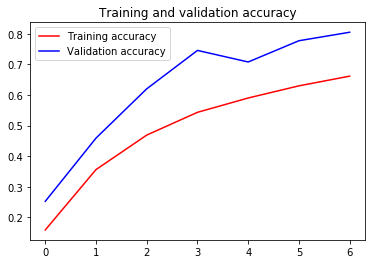

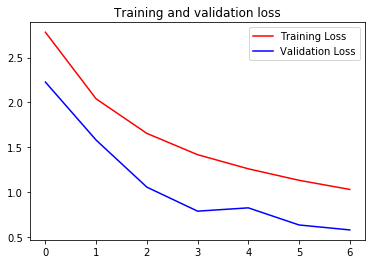

In [8]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
# Your Code Here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);